In [1]:
# Import numpy+extensions, i/o functions, preprocessing, and visualization.
import numpy as numx
import pydeep.base.numpyextension as numxext
import pydeep.misc.io as io
import pydeep.preprocessing as pre
import pydeep.misc.visualization as vis

# Model imports: RBM estimator, model and trainer module
import pydeep.rbm.estimator as estimator
import pydeep.rbm.model as model
import pydeep.rbm.trainer as trainer

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<class 'numpy.ndarray'>


AttributeError: 'Axes3DSubplot' object has no attribute 'gca'

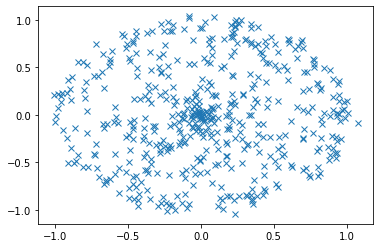

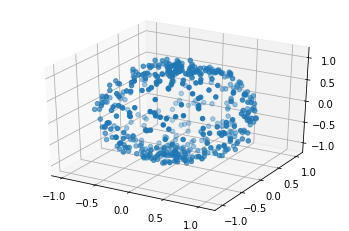

In [9]:
    m = 500
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    #r = np.random.uniform(0,10)
    r=1
    # create dataset
    Phi = 2*np.pi*np.random.rand(m) - np.pi
    Theta = np.pi*np.random.rand(m) - 0.5*np.pi
    X = r*(1+x_eps)*np.cos(Theta)*np.cos(Phi)
    Y = r*(1+y_eps)*np.cos(Theta)*np.sin(Phi)
    Z = r*(1+z_eps)*np.sin(Theta)
    data_sphere = np.array([X,Y,Z])
    print(type(data_sphere))
    plt.plot(X,Y, 'x')
    # Plotting 3D sphere
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(X,Y,Z)
    ax.gca().set_aspect('equal', adjustable='box')

<h3>Noisy Sphere Data

In [3]:
def return_sphere(m):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    #r = np.random.uniform(0,10)
    r=1
    # create dataset
    Phi = 2*np.pi*np.random.rand(m) - np.pi
    Theta = np.pi*np.random.rand(m) - 0.5*np.pi
    X = r*(1+x_eps)*np.cos(Theta)*np.cos(Phi)
    Y = r*(1+y_eps)*np.cos(Theta)*np.sin(Phi)
    Z = r*(1+z_eps)*np.sin(Theta)
    data_sphere = np.array([X,Y,Z])
    #print(type(data_sphere))
    # plt.plot(X,Y, 'x')
    ## Plotting 3D sphere
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(X,Y,Z)
    return data_sphere


<h3>Noisy Ellipsoid

In [4]:
# def return_ellipsoid(m,stretch):
#     noise_parameter = 0.05 #amount of noise away from a true sphere.
#     a_x = np.random.uniform(low=9,high=10)#x-direction stretch
#     b_y = np.random.uniform(low=0,high=10)#y-direction stretch
#     c_z  = 1/stretch#z-direction stretch
#     x_eps = np.random.normal(size = m)*noise_parameter
#     y_eps = np.random.normal(size = m)*noise_parameter
#     z_eps = np.random.normal(size = m)*noise_parameter
#     # create dataset
#     Phi = 2*np.pi*np.random.rand(m) - np.pi
#     Theta = np.pi*np.random.rand(m) - 0.5*np.pi
#     X = a_x*(1+x_eps)*np.cos(Theta)*np.cos(Phi)
#     Y = b_y*(1+y_eps)*np.cos(Theta)*np.sin(Phi)
#     Z = c_z*(1+z_eps)*np.sin(Theta)
#     data_ellipsoid = np.array([X,Y,Z])
#     #print(type(data_ellipsoid))
#     # plt.plot(X,Y, 'x')
#     # #Plotting 3D ellipsoid
#     # fig = plt.figure()
#     # ax = plt.axes(projection='3d')
#     # ax.scatter(X,Y,Z)
#     return data_ellipsoid

def return_ellipsoid(m,stretch):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    a_x = stretch#x-direction stretch
    b_y = 1#y-direction stretch
    c_z  = 1#z-direction stretch
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    Phi = 2*np.pi*np.random.rand(m) - np.pi
    Theta = np.pi*np.random.rand(m) - 0.5*np.pi
    X = a_x*(1+x_eps)*np.cos(Theta)*np.cos(Phi)
    Y = b_y*(1+y_eps)*np.cos(Theta)*np.sin(Phi)
    Z = c_z*(1+z_eps)*np.sin(Theta)
    data_ellipsoid = np.array([X,Y,Z])
    #print(type(data_ellipsoid))
    # plt.plot(X,Y, 'x')
    # #Plotting 3D ellipsoid
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(X,Y,Z)
    return data_ellipsoid



In [5]:
## Set random seed (optional)
## (optional, if stochastic processes are involved we get the same results)
numx.random.seed(42)

In [6]:
# training_data_size = 10000 # we have 10000 training examples (5000 spheres and 5000 ellipsoids)
# group_size = training_data_size//2
# data_size = 100                   # each sphere/ellipsoid has 1000 data points
# data = []

# data = np.zeros((training_data_size,data_size))  # 3 --> X,Y,Z coordinates
# data[:group_size,:] = np.random.uniform(size =(group_size,data_size))
# data[group_size:,:] = np.random.normal(loc = 10, size =(group_size,data_size))

# # for i in range(group_size):
# #     data[i,:,:] = generate_sphere()

# # for i in range(group_size,training_data_size):
# #     data[group_size:,:] = generate_ellipsoid()
# data = np.random.permutation(data)
# print(type(data))
# print(np.shape(data))


training_data_size = 100000
group_size = training_data_size//2
data_size = 100
#print(np.shape(return_sphere(100)))
training_set = np.zeros((training_data_size,3,data_size))
for i in range(group_size):
    training_set[i,:,:] = return_sphere(data_size)
    training_set[group_size+i,:,:] = return_ellipsoid(data_size,10)
#training_set[:group_size,:] = np.random.uniform(size =(group_size,data_size))
#training_set[group_size:,:] = np.random.normal(size =(group_size,data_size))
#print(training_set[0])
training_set = np.random.permutation(training_set)
#print(training_set[0])
data = torch.FloatTensor(training_set)
#print(np.shape(data))
#print(data_tensor[-1])
data = data.reshape([training_data_size,3*data_size]) 
data = data.numpy()
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(100000, 300)


In [7]:
# Set input/output dimensions
v1 = 300
v2 = 1
h1 = 2
h2 = 1

# Whiten data using ZCA
zca = pre.ZCA(v1 * v2)
zca.train(data)
data = zca.project(data)

In [8]:
# Split into training/test data
train_data = data[0:50000]
test_data = data[50000:100000]

#Set restriction factor, learning rate, batch size and maximal number of epochs
restrict = 0.01 * numx.max(numxext.get_norms(train_data, axis=1))
eps = 0.1
batch_size = 1000
max_epochs = 200

In [9]:
# Create model, initial weights=Glorot init., initial sigma=1.0, initial bias=0,
# no centering (Usually pass the data=training_data for a automatic init. that is
# set the bias and sigma to the data mean and data std. respectively, for
# whitened data centering is not an advantage)
rbm = model.GaussianBinaryVarianceRBM(number_visibles=v1 * v2,
                                      number_hiddens=h1 * h2,
                                      initial_weights='AUTO',
                                      initial_visible_bias=0,
                                      initial_hidden_bias=0,
                                      initial_sigma=1.0,
                                      initial_visible_offsets=0.0,
                                      initial_hidden_offsets=0.0,
                                      dtype=numx.float64)

# Set the hidden bias such that the scaling factor is 0.01
rbm.bh = -(numxext.get_norms(rbm.w + rbm.bv.T, axis=0) - numxext.get_norms(
    rbm.bv, axis=None)) / 2.0 + numx.log(0.01)
rbm.bh = rbm.bh.reshape(1, h1 * h2)

In [10]:
# Training with CD-1
k = 1
trainer_cd = trainer.CD(rbm)

# Train model, status every 10th epoch
step = 10
print('Training')
print('Epoch\tRE train\tRE test')
for epoch in range(0, max_epochs + 1, 1):

    # Shuffle training samples (optional)
    train_data = numx.random.permutation(train_data)

    # Print epoch and reconstruction errors every 'step' epochs.
    if epoch % step == 0:
        RE_train = numx.mean(estimator.reconstruction_error(rbm, train_data))
        RE_test = numx.mean(estimator.reconstruction_error(rbm, test_data))
        print('%5d \t%0.5f \t%0.5f' % (epoch, RE_train, RE_test))

    # Train one epoch with gradient restriction/clamping
    # No weight decay, momentum or sparseness is used
    for b in range(0, train_data.shape[0], batch_size):
        trainer_cd.train(data=train_data[b:(b + batch_size), :],
                         num_epochs=1,
                         epsilon=[eps, 0.0, eps, eps * 0.1],
                         k=k,
                         momentum=0.0,
                         reg_l1norm=0.0,
                         reg_l2norm=0.0,
                         reg_sparseness=0,
                         desired_sparseness=None,
                         update_visible_offsets=0.0,
                         update_hidden_offsets=0.0,
                         offset_typ='00',
                         restrict_gradient=restrict,
                         restriction_norm='Cols',
                         use_hidden_states=False,
                         use_centered_gradient=False)


Training
Epoch	RE train	RE test
    0 	0.99875 	1.00054
   10 	0.99873 	1.00054
   20 	0.99859 	1.00043
   30 	0.99819 	1.00010
   40 	0.99766 	0.99967
   50 	0.99738 	0.99946
   60 	0.99726 	0.99939
   70 	0.99720 	0.99936
   80 	0.99716 	0.99936
   90 	0.99714 	0.99937
  100 	0.99711 	0.99936
  110 	0.99710 	0.99937
  120 	0.99711 	0.99940
  130 	0.99707 	0.99938
  140 	0.99711 	0.99943
  150 	0.99707 	0.99941
  160 	0.99707 	0.99942
  170 	0.99708 	0.99944
  180 	0.99707 	0.99944
  190 	0.99707 	0.99945
  200 	0.99706 	0.99945


In [11]:
# print(rbm.w)
# print(rbm.bh)
# print(rbm.output_dim)

<class 'numpy.ndarray'>
(2000, 300)


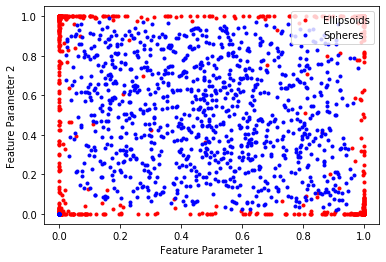

In [28]:
from pydeep.base.activationfunction import Sigmoid
import pydeep.rbm.dbn as dbn

test_data_size = 2000
group_size = test_data_size//2
data_size = 100
test_set = np.zeros((test_data_size,3,data_size))
for i in range(group_size):
    test_set[i,:,:] = return_sphere(data_size)
    test_set[group_size+i,:,:] = return_ellipsoid(data_size,10)

data = torch.FloatTensor(test_set)
data = data.reshape([test_data_size,3*data_size]) 
data = data.numpy()
print(type(data))
print(np.shape(data))

number_of_points = test_data_size

sphere_points    = data[0:group_size]

ellipsoid_points = data[group_size:test_data_size]

ellipsoid_feature1 = np.zeros(number_of_points)
ellipsoid_feature2 = np.zeros(number_of_points)

sphere_feature1 = np.zeros(number_of_points)
sphere_feature2 = np.zeros(number_of_points)

for i in range(number_of_points//2):

    sphere_feature = Sigmoid.f(numx.dot(rbm.w.T,sphere_points[i])+ rbm.bv.T)   
    ellipsoid_feature =  Sigmoid.f(numx.dot(rbm.w.T,ellipsoid_points[i]) + rbm.bv.T)
    
###    uniform_feature = dbn.forward_propagate(uniform_points[i], sample=False)
###    normal_feature = dbn.forward_propagate(normal_points[i], sample=False)
###    uniform_feature= uniform_feature.detach().numpy()
###    normal_feature = normal_feature.detach().numpy()
#    normal_feature1[i] = normal_feature1[i].bcast(1,2)

    ellipsoid_feature1[i] = ellipsoid_feature[0,0]
    ellipsoid_feature2[i] = ellipsoid_feature[0,1]
    sphere_feature1[i] = sphere_feature[0,0]
    sphere_feature2[i] = sphere_feature[0,1]
    
plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
#plt.title('Feature Extraction for Spheres vs Ellipsoids')
plt.plot(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')
plt.plot(sphere_feature1,sphere_feature2,'b.',label='Spheres')
plt.legend(loc='upper right')
plt.show()


##print(np.size(uniform_feature))

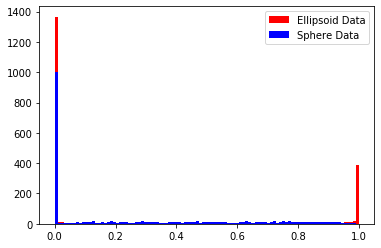

In [16]:
plt.figure()
bins = np.linspace(0, 1, 100)
plt.hist(ellipsoid_feature2,bins,color = 'red',label = 'Ellipsoid Data')
plt.hist(sphere_feature2,bins,color = 'blue', label = 'Sphere Data')
plt.legend(loc='upper right')
plt.show() #make the bar sizes the same!